In [11]:
import numpy as np
import struct
# import pandas as pd
# import xarray as xr
# import geopandas as gpd
# import regionmask, struct
import matplotlib.pyplot as plt
import rioxarray
from pyproj import Transformer
import cartopy.crs as ccrs

In [12]:
obj = ccrs.LambertAzimuthalEqualArea(105, 47)
obj_proj = obj.to_string()

transformer = Transformer.from_crs('EPSG:4326', obj_proj)
transformer_inv = Transformer.from_crs(obj_proj, 'EPSG:4326')

workplace = './'

In [78]:
def load_gdat_files(rank_list, ncols=10, nrows = 10, ntime=365, 
                    varname='tair', path = '.', suffix='gdat'):

    import os

    for i, ii in enumerate(rank_list):

        bin_sub_path = os.path.join(path, varname + '_'+str(ii)+'.'+suffix)

        with open(bin_sub_path) as f:
            rectype = np.dtype(np.float32)
            bdata = np.fromfile(f, dtype=rectype)

        bdata = np.reshape(bdata, [ntime, int(bdata.shape[0] / ntime)])

        # print(bdata.shape)

        if i == 0: 
            dump = bdata.copy()
        else:
            dump = np.hstack((dump, bdata))

    dump = np.reshape(dump, [ntime, ncols, nrows])

    return dump


In [82]:
data = load_gdat_files(np.arange(10), ncols=485, nrows=513, ntime=365, 
                       path=workplace+'outputs/wo_assim/',
                       varname='snod')

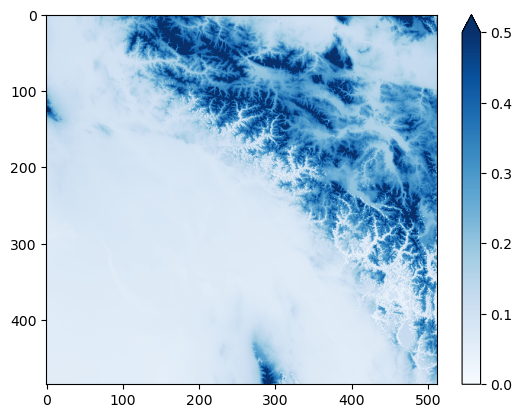

In [90]:
plt.imshow(np.flipud(data[150,:,:]),vmin=0, vmax=0.50, cmap = 'Blues')
plt.colorbar(extend = 'max')